In [ ]:
import cv2
print(cv2.__version__)  # Should be 4.x

4.11.0


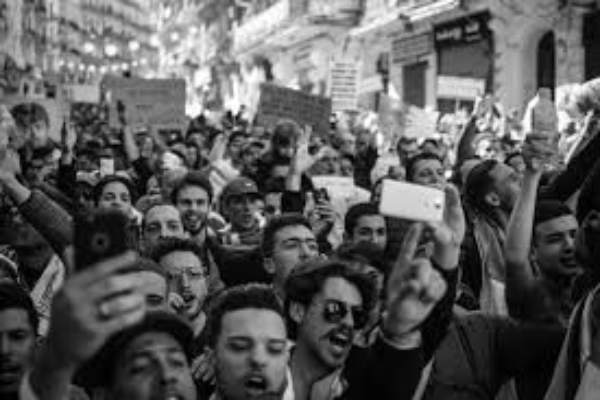

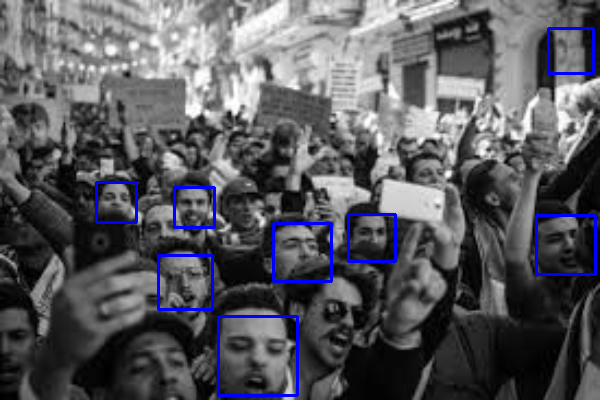

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if face_cascade.empty():
    print("Error: Haar cascade file not loaded correctly.")

def detect_faces(image):
    # Convert image to grayscale for better detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    return image

# Choose whether to process an image or a video
mode = "image"  # Change to "image" for image processing

if mode == "image":
    image_path = '/img2.jpg'  # Replace with the actual image path
    image = cv2.imread(image_path)
    image = cv2.resize(image, (600, 400))
    cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    if image is None:
        print("Error: Could not load image. Check the file path.")
    else:
        processed_image = detect_faces(image)
        cv2_imshow(processed_image)

elif mode == "video":
    video_path = '/content/sample_data/input1.mp4'  # Replace with the actual video path
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video. Check the file path.")
    else:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            processed_frame = detect_faces(frame)
            cv2_imshow(processed_frame)

        cap.release()

cv2.destroyAllWindows()